# Modelling Notebook

## Modelling Dashboard

Uses Cleaned Preprocessed Data Without Sensitive Information. <br/>
Preprocessing of Sensitive Data Is Handled Separately.

In [1]:
# General
import random
random.seed(42)
import pickle
import numpy as np
import pandas as pd
from scipy.stats import randint

# Visualisation
import matplotlib.pyplot as plt
import scikitplot as skplt

# Evaluation Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Regression Metrics

1. **Mean Absolute Error (MAE)**
   - Formula: $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $
   - Description: The average of the absolute differences between the predicted values and actual values. It gives an idea of how wrong the predictions were.
   

2. **Mean Absolute Percentage Error (MAPE)**
   - Formula: $ \text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} |\frac{y_i - \hat{y}_i}{y_i}| $
   - Description: Provides an intuitive understanding of model's predictive accuracy relative to actual values. It measures the absolute percentage difference between the predicted values and the actual values.


3. **Mean Squared Error (MSE)**
   - Formula: $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
   - Description: The average of the squared differences between the predicted values and actual values. It penalizes larger errors more than MAE.


4. **Root Mean Squared Error (RMSE)**
   - Formula: $ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $
   - Description: The square root of the average of the squared differences between the predicted values and actual values. It is in the same units as the response variable and is sensitive to outliers.


5. **R-squared (Coefficient of Determination)**
   - Formula: $ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $
   - Description: The proportion of the variance in the dependent variable that is predictable from the independent variables. It provides a measure of how well observed outcomes are replicated by the model.



### Modelling Job Duration Prediction

#### Import Dataset

In [2]:
# Read Dataset
aa_job_duration_df = pd.read_csv('./datasets/aa_job_duration.csv')

In [3]:
# Split Training & Testing Dataset
# Dependent Variable
target_list = ['duration']

# Independent Variables
feature_list = ['id', 'date', 'delay', 'category', 'equipment', 'items', 'service', 'staff']
print(feature_list)

# Selecting Target Variable and Features from Dataset
X = aa_job_duration_df[feature_list]
y = aa_job_duration_df[target_list]

# Split Training & Testing Dataset (80:20 Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Reset Indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

['id', 'date', 'delay', 'category', 'equipment', 'items', 'service', 'staff']


#### Feature Engineering

In [4]:
# Perform one-hot encoding for the 'category', 'equipment', and 'service' columns
X_train_one_hot_category = pd.get_dummies(X_train['category'], prefix='category')
X_train_one_hot_equipment = pd.get_dummies(X_train['equipment'], prefix='equipment')
X_train_one_hot_service = pd.get_dummies(X_train['service'], prefix='service')

# Concatenate the one-hot encoded DataFrames with the original DataFrame
X_train_encoded = pd.concat([X_train, X_train_one_hot_category, X_train_one_hot_equipment, X_train_one_hot_service], axis=1)

# Drop the original categorical columns if you no longer need them
X_train_encoded = X_train_encoded.drop(columns=['category', 'equipment', 'service'])

In [5]:
# Perform one-hot encoding for the 'category', 'equipment', and 'service' columns
X_test_one_hot_category = pd.get_dummies(X_test['category'], prefix='category')
X_test_one_hot_equipment = pd.get_dummies(X_test['equipment'], prefix='equipment')
X_test_one_hot_service = pd.get_dummies(X_test['service'], prefix='service')

# Concatenate the one-hot encoded DataFrames with the original DataFrame
X_test_encoded = pd.concat([X_test, X_test_one_hot_category, X_test_one_hot_equipment, X_test_one_hot_service], axis=1)

# Drop the original categorical columns if you no longer need them
X_test_encoded = X_test_encoded.drop(columns=['category', 'equipment', 'service'])

#### Feature Selection

In [6]:
# Keep Selected Features
X_train_selected = X_train_encoded.drop(columns=['date', 'delay', 'id'])
X_test_selected = X_test_encoded.drop(columns=['date', 'delay', 'id'])

#### Machine Learning Modelling

In [7]:
# Evaluation 
def evaluate(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)
    
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared Coefficient (R^2):", r_squared)

# Features Used
feature_names = X_train_selected.columns

##### Baseline Modelling

In [8]:
## Model Training
# Linear Regression
reg_lr = LinearRegression().fit(X_train_selected, y_train)
y_pred_lr = reg_lr.predict(X_test_selected)

evaluate(y_test, y_pred_lr)

Mean Absolute Error (MAE): 12.986041392363397
Mean Squared Error (MSE): 375.61222609318423
Root Mean Squared Error (RMSE): 19.380717894164402
R-squared Coefficient (R^2): 0.9473023204662383


In [9]:
# Decision Tree Regressor
reg_dtr = DecisionTreeRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_dtr = reg_dtr.predict(X_test_selected)

evaluate(y_test, y_pred_dtr)

Mean Absolute Error (MAE): 9.898818651846055
Mean Squared Error (MSE): 211.43639172009668
Root Mean Squared Error (RMSE): 14.540852510086768
R-squared Coefficient (R^2): 0.9703358771663723


In [10]:
## Hyperparameter Tuning
# Use RandomSearch 
param_dist = {
    "max_depth": randint(1, 20),  
    "min_samples_split": randint(2, 40),  
    "min_samples_leaf": randint(1, 20), 
    "max_features": [1.0, "sqrt", "log2", None],
}

rscv_dtr = RandomizedSearchCV(estimator = DecisionTreeRegressor(random_state=42), param_distributions = param_dist, n_iter = 100, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = -1).fit(X_train_selected, y_train)

best_params_dtr = rscv_dtr.best_params_
print("Best Parameters For Decision Tree:", best_params_dtr)

y_pred_rscv_dtr = rscv_dtr.predict(X_test_selected)

evaluate(y_test, y_pred_rscv_dtr)

Best Parameters For Decision Tree: {'max_depth': 17, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 34}
Mean Absolute Error (MAE): 9.909380141712504
Mean Squared Error (MSE): 211.47025401309085
Root Mean Squared Error (RMSE): 14.542016848191686
R-squared Coefficient (R^2): 0.970331126351195


##### Advanced Modelling

In [11]:
# Random Forest Regressor
reg_rfr = RandomForestRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_rfr = reg_rfr.predict(X_test_selected)

evaluate(y_test, y_pred_rfr)

Mean Absolute Error (MAE): 9.902402738743598
Mean Squared Error (MSE): 211.4888842641694
Root Mean Squared Error (RMSE): 14.542657400357385
R-squared Coefficient (R^2): 0.9703285125624715


In [12]:
# XG Boost Regressor
reg_xgbr = XGBRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_xgbr = reg_xgbr.predict(X_test_selected)

evaluate(y_test, y_pred_xgbr)

Mean Absolute Error (MAE): 9.898744374690203
Mean Squared Error (MSE): 211.43350985223458
Root Mean Squared Error (RMSE): 14.540753414188503
R-squared Coefficient (R^2): 0.9703362814869415


In [13]:
# LightGBM Regressor
reg_lgbmr = lgb.LGBMRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_lgbmr = reg_lgbmr.predict(X_test_selected)

evaluate(y_test, y_pred_lgbmr)

Mean Absolute Error (MAE): 9.907213442153378
Mean Squared Error (MSE): 211.67175708913888
Root Mean Squared Error (RMSE): 14.548943504225276
R-squared Coefficient (R^2): 0.9703028558536207


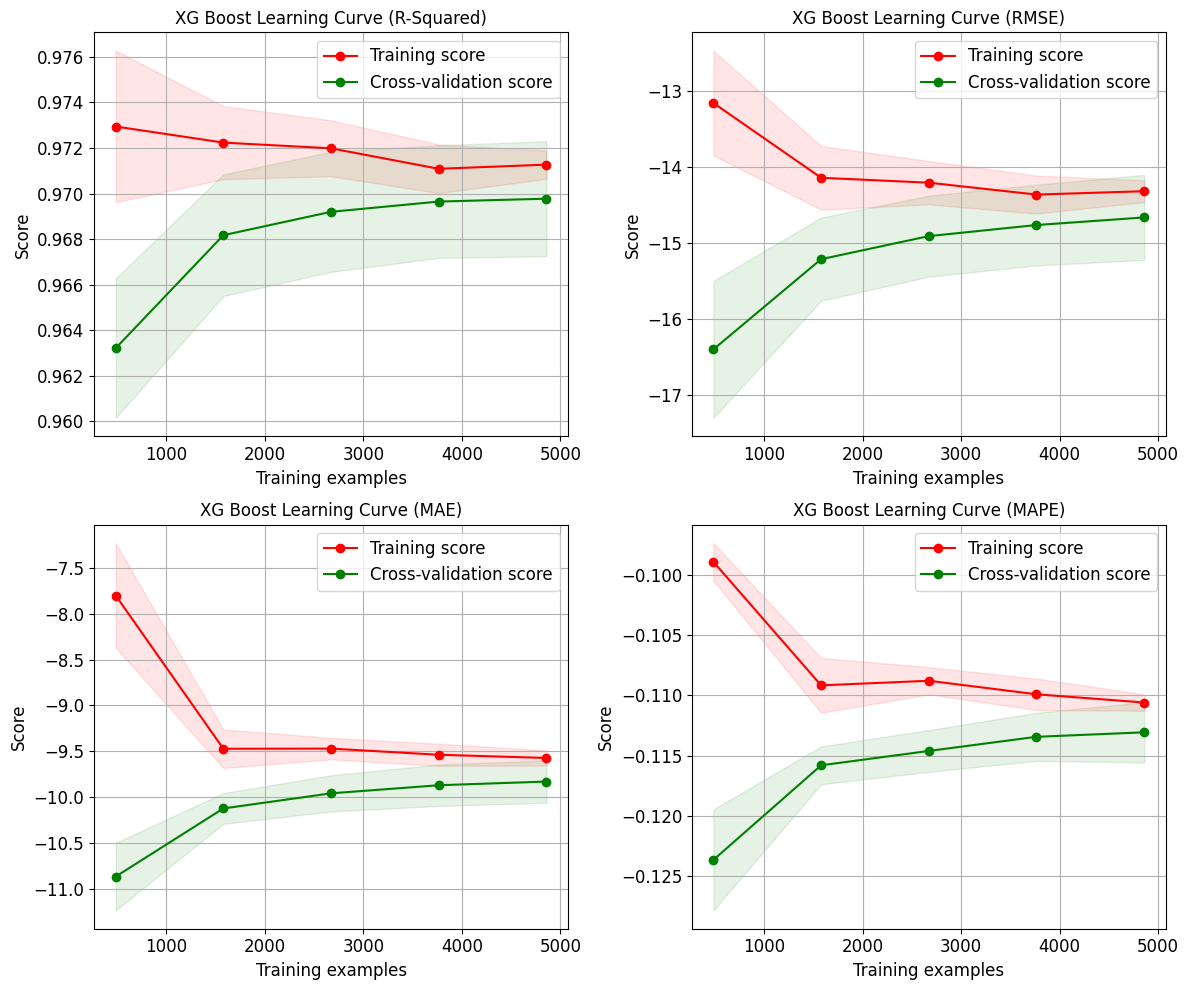

In [14]:
## Cross Validation
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
ax1, ax2, ax3, ax4 = axes.flatten() 
y_train_reshaped = np.ravel(y_train)

# Learning curves
skplt.estimators.plot_learning_curve(XGBRegressor(random_state=42), X_train_selected, y_train_reshaped,
                                     cv=5, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="XG Boost Learning Curve (R-Squared)", ax=ax1)
skplt.estimators.plot_learning_curve(XGBRegressor(random_state=42), X_train_selected, y_train_reshaped,
                                     cv=5, shuffle=True, scoring="neg_root_mean_squared_error", n_jobs=-1,
                                     figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="XG Boost Learning Curve (RMSE)", ax=ax2)
skplt.estimators.plot_learning_curve(XGBRegressor(random_state=42), X_train_selected, y_train_reshaped,
                                     cv=5, shuffle=True, scoring="neg_mean_absolute_error", n_jobs=-1,
                                     figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="XG Boost Learning Curve (MAE)", ax=ax3)
skplt.estimators.plot_learning_curve(XGBRegressor(random_state=42), X_train_selected, y_train_reshaped,
                                     cv=5, shuffle=True, scoring="neg_mean_absolute_percentage_error", n_jobs=-1,
                                     figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="XG Boost Learning Curve (MAPE)", ax=ax4)

plt.tight_layout()
plt.show()

In [15]:
## Hyperparameter Tuning
# Use Grid Search
y_train_reshaped = np.ravel(y_train)

params = { 
    'max_depth': [5, 10, 12, 15, 17, 20],     
    'min_samples_split': [2, 5, 10, 15, 20, 40], 
    'min_samples_leaf': [1, 3, 5, 7, 10, 20],
    "max_features": [1.0, None],
}

gscv_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                        param_grid=params, 
                        scoring='neg_root_mean_squared_error', 
                        n_jobs=-1)
gscv_rfr.fit(X_train_selected, y_train_reshaped)

best_params_rfr = gscv_rfr.best_params_
print("Best Parameters For Random Forest:", best_params_rfr)

y_pred_gscv_rfr = gscv_rfr.predict(X_test_selected)

evaluate(y_test, y_pred_gscv_rfr)

Best Parameters For Random Forest: {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 7, 'min_samples_split': 40}
Mean Absolute Error (MAE): 9.897964774597456
Mean Squared Error (MSE): 211.38157846139515
Root Mean Squared Error (RMSE): 14.538967585815547
R-squared Coefficient (R^2): 0.970343567362113


<Axes: title={'center': 'Random Forest Regressor with Hyperparameter Tuning Feature Importance'}>

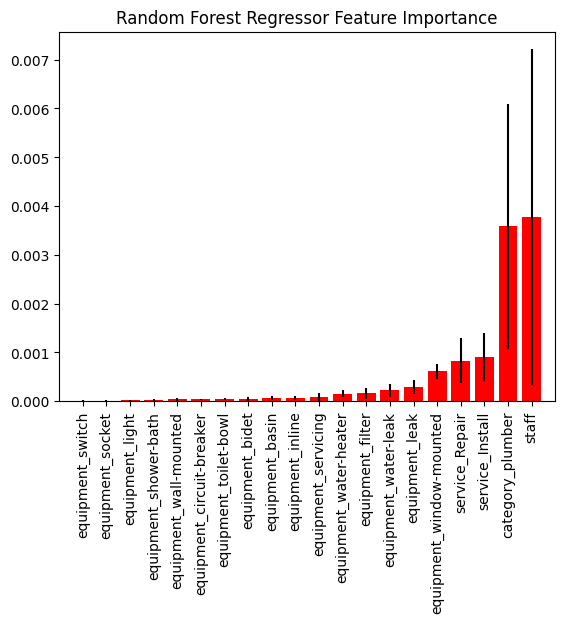

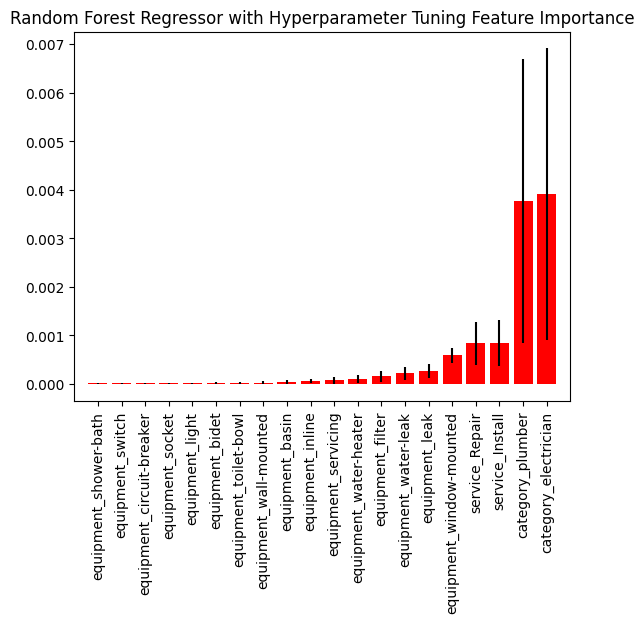

In [16]:
## Feature Evaluation
# Feature Importance Visualisation
skplt.estimators.plot_feature_importances(reg_rfr, feature_names = feature_names,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending")
skplt.estimators.plot_feature_importances(gscv_rfr.best_estimator_, feature_names = feature_names,
                                         title="Random Forest Regressor with Hyperparameter Tuning Feature Importance",
                                         x_tick_rotation=90, order="ascending")

In [17]:
# Dump Model Into Pickle
pickle.dump(gscv_rfr, open('../public/analytics/advanced/job-duration-model.pkl', 'wb'))

### Modelling Service Price Prediction

#### Import Dataset

In [18]:
# Read Dataset
aa_service_price_df = pd.read_csv('./datasets/aa_service_price.csv')

In [19]:
# Split Training & Testing Dataset
# Dependent Variable
target_list = ['price']

# Independent Variables
feature_list = ['id', 'date', 'category', 'equipment', 'items', 'service']
print(feature_list)

# Selecting Target Variable and Features from Dataset
X = aa_service_price_df[feature_list]
y = aa_service_price_df[target_list]

# Split Training & Testing Dataset (80:20 Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Reset Indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

['id', 'date', 'category', 'equipment', 'items', 'service']


#### Feature Engineering

In [20]:
# Perform one-hot encoding for the 'category', 'equipment', and 'service' columns
X_train_one_hot_category = pd.get_dummies(X_train['category'], prefix='category')
X_train_one_hot_equipment = pd.get_dummies(X_train['equipment'], prefix='equipment')
X_train_one_hot_service = pd.get_dummies(X_train['service'], prefix='service')

# Concatenate the one-hot encoded DataFrames with the original DataFrame
X_train_encoded = pd.concat([X_train, X_train_one_hot_category, X_train_one_hot_equipment, X_train_one_hot_service], axis=1)

# Drop the original categorical columns if you no longer need them
X_train_encoded = X_train_encoded.drop(columns=['category', 'equipment', 'service'])

In [21]:
# Perform one-hot encoding for the 'category', 'equipment', and 'service' columns
X_test_one_hot_category = pd.get_dummies(X_test['category'], prefix='category')
X_test_one_hot_equipment = pd.get_dummies(X_test['equipment'], prefix='equipment')
X_test_one_hot_service = pd.get_dummies(X_test['service'], prefix='service')

# Concatenate the one-hot encoded DataFrames with the original DataFrame
X_test_encoded = pd.concat([X_test, X_test_one_hot_category, X_test_one_hot_equipment, X_test_one_hot_service], axis=1)

# Drop the original categorical columns if you no longer need them
X_test_encoded = X_test_encoded.drop(columns=['category', 'equipment', 'service'])

#### Feature Selection

In [22]:
# Keep Selected Features
X_train_selected = X_train_encoded.drop(columns=['date', 'id'])
X_test_selected = X_test_encoded.drop(columns=['date', 'id'])

#### Machine Learning Modelling

##### Baseline Modelling

In [23]:
## Model Training
# Linear Regression
reg_lr = LinearRegression().fit(X_train_selected, y_train)
y_pred_lr = reg_lr.predict(X_test_selected)

evaluate(y_test, y_pred_lr)

Mean Absolute Error (MAE): 55.223996050032916
Mean Squared Error (MSE): 5728.921782422646
Root Mean Squared Error (RMSE): 75.68964118307503
R-squared Coefficient (R^2): 0.7707830089398304


In [24]:
# Decision Tree Regressor
reg_dtr = DecisionTreeRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_dtr = reg_dtr.predict(X_test_selected)

evaluate(y_test, y_pred_dtr)

Mean Absolute Error (MAE): 20.183039236344875
Mean Squared Error (MSE): 1135.3047455673955
Root Mean Squared Error (RMSE): 33.694283574033676
R-squared Coefficient (R^2): 0.9545758961985263


In [ ]:
## Hyperparameter Tuning
# Use RandomSearch 
param_dist = {
    "max_depth": randint(1, 20),  
    "min_samples_split": randint(2, 40),  
    "min_samples_leaf": randint(1, 20), 
    "max_features": [1.0, "sqrt", "log2", None],
}

rscv_dtr = RandomizedSearchCV(estimator = DecisionTreeRegressor(random_state=42), param_distributions = param_dist, n_iter = 100, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = -1).fit(X_train_selected, y_train)

best_params_dtr = rscv_dtr.best_params_
print("Best Parameters For Decision Tree:", best_params_dtr)

y_pred_rscv_dtr = rscv_dtr.predict(X_test_selected)

evaluate(y_test, y_pred_rscv_dtr)

Best Parameters For Decision Tree: {'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 11}
Mean Absolute Error (MAE): 20.207815988309513
Mean Squared Error (MSE): 1136.1725279260002
Root Mean Squared Error (RMSE): 33.70715840776259
R-squared Coefficient (R^2): 0.9545411757976047


##### Advanced Modelling

In [26]:
# Random Forest Regressor
reg_rfr = RandomForestRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_rfr = reg_rfr.predict(X_test_selected)

evaluate(y_test, y_pred_rfr)

Mean Absolute Error (MAE): 20.19506956993985
Mean Squared Error (MSE): 1135.9543624229764
Root Mean Squared Error (RMSE): 33.70392206291393
R-squared Coefficient (R^2): 0.9545499047071719


In [27]:
# XG Boost Regressor
reg_xgbr = XGBRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_xgbr = reg_xgbr.predict(X_test_selected)

evaluate(y_test, y_pred_xgbr)

Mean Absolute Error (MAE): 20.182140376710674
Mean Squared Error (MSE): 1135.245766065041
Root Mean Squared Error (RMSE): 33.69340834740589
R-squared Coefficient (R^2): 0.9545782559975562


In [28]:
# LightGBM Regressor
reg_lgbmr = lgb.LGBMRegressor(random_state=42).fit(X_train_selected, y_train)
y_pred_lgbmr = reg_lgbmr.predict(X_test_selected)

evaluate(y_test, y_pred_lgbmr)

Mean Absolute Error (MAE): 20.138352924469842
Mean Squared Error (MSE): 1115.5626321497307
Root Mean Squared Error (RMSE): 33.40003940341584
R-squared Coefficient (R^2): 0.9553657879105497


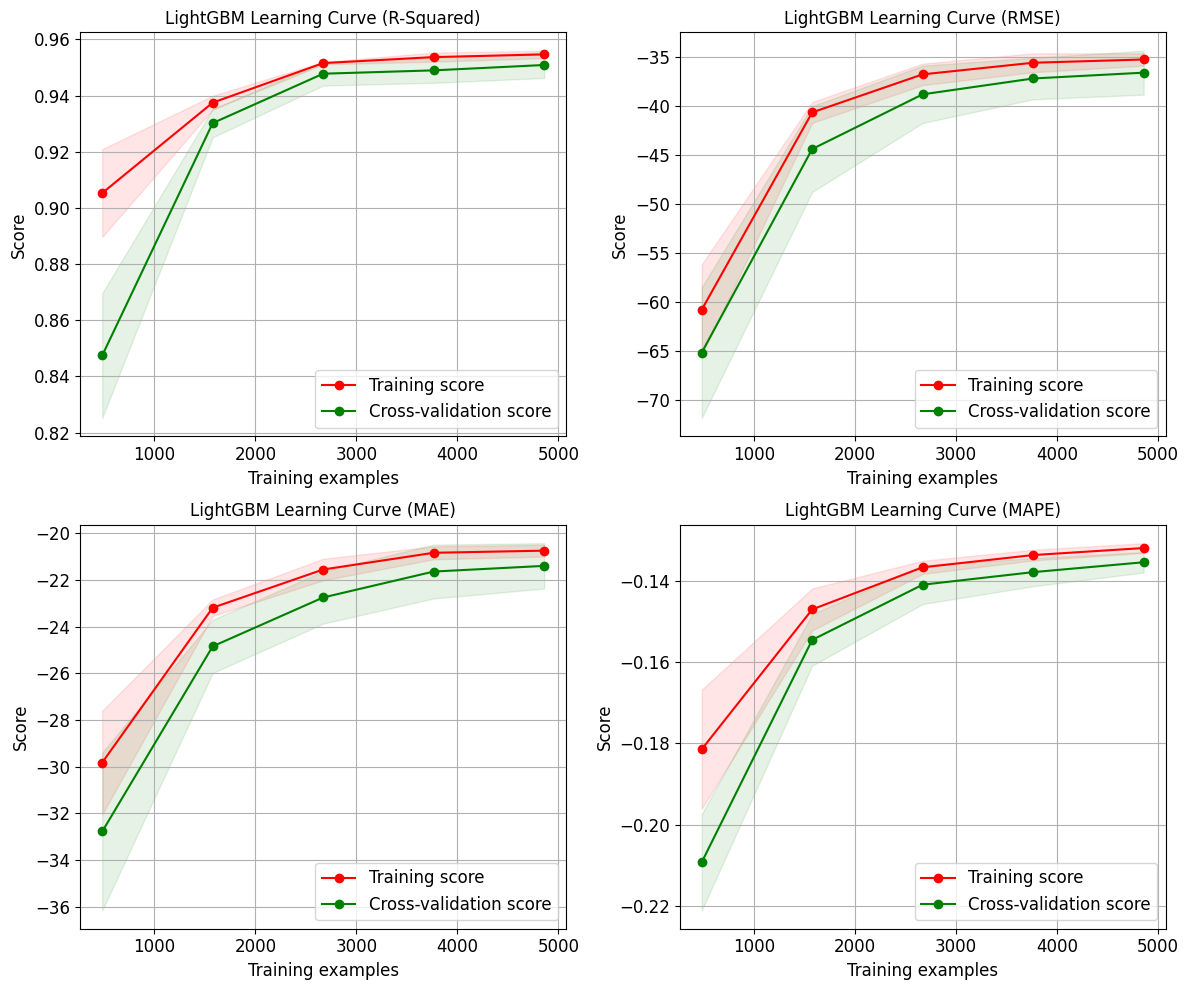

In [29]:
## Cross Validation
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
ax1, ax2, ax3, ax4 = axes.flatten() 
y_train_reshaped = np.ravel(y_train)

# Learning curves
skplt.estimators.plot_learning_curve(lgb.LGBMRegressor(random_state=42), X_train_selected, y_train_reshaped,
                                     cv=5, shuffle=True, scoring="r2", n_jobs=-1,
                                     figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="LightGBM Learning Curve (R-Squared)", ax=ax1)
skplt.estimators.plot_learning_curve(lgb.LGBMRegressor(random_state=42), X_train_selected, y_train_reshaped,
                                     cv=5, shuffle=True, scoring="neg_root_mean_squared_error", n_jobs=-1,
                                     figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="LightGBM Learning Curve (RMSE)", ax=ax2)
skplt.estimators.plot_learning_curve(lgb.LGBMRegressor(random_state=42), X_train_selected, y_train_reshaped,
                                     cv=5, shuffle=True, scoring="neg_mean_absolute_error", n_jobs=-1,
                                     figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="LightGBM Learning Curve (MAE)", ax=ax3)
skplt.estimators.plot_learning_curve(lgb.LGBMRegressor(random_state=42), X_train_selected, y_train_reshaped,
                                     cv=5, shuffle=True, scoring="neg_mean_absolute_percentage_error", n_jobs=-1,
                                     figsize=(6, 4), title_fontsize="large", text_fontsize="large",
                                     title="LightGBM Learning Curve (MAPE)", ax=ax4)

plt.tight_layout()
plt.show()

In [38]:
## Hyperparameter Tuning
# Random Search
params = { 
    'max_depth': randint(1, 20),  
    'num_leaves': randint(5, 500),
    'min_data_in_leaf': randint(5, 500),
    'learning_rate': [0.01, 0.05, 0.10, 0.50],
}

rscv_lgbm = RandomizedSearchCV(estimator = lgb.LGBMRegressor(random_state=42), param_distributions = params,
                               scoring = 'neg_root_mean_squared_error', n_jobs = -1).fit(X_train_selected, y_train)

best_params_lgbm = rscv_lgbm.best_params_
print("Best Parameters For LightGBM:", best_params_lgbm)

y_pred_rscv_lgbm = rscv_lgbm.predict(X_test_selected)

evaluate(y_test, y_pred_rscv_lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
Best Parameters For LightGBM: {'learning_rate': 0.5, 'max_depth': 13, 'min_data_in_leaf': 88, 'num_leaves': 231}
Mean Absolute Error (MAE): 20.356310204689976
Mean Squared Error (MSE): 1121.1562579937315
Root Mean Squared Error (RMSE): 33.48367151304844
R-squared Coefficient (R^2): 0.9551419841768328


<Axes: title={'center': 'LightGBM Regressor with Hyperparameter Tuning Feature Importance'}>

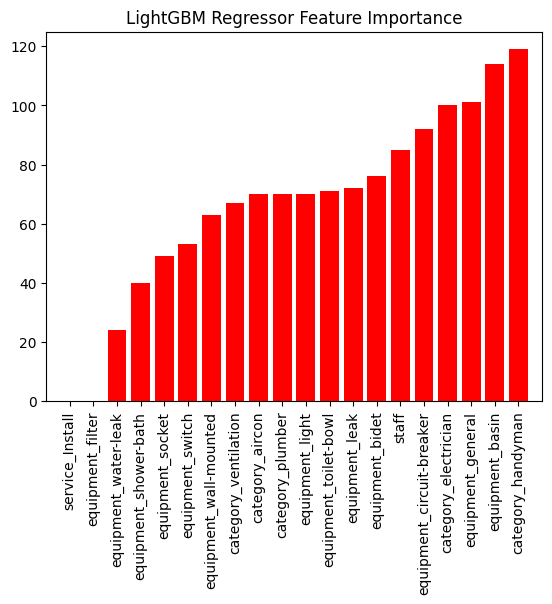

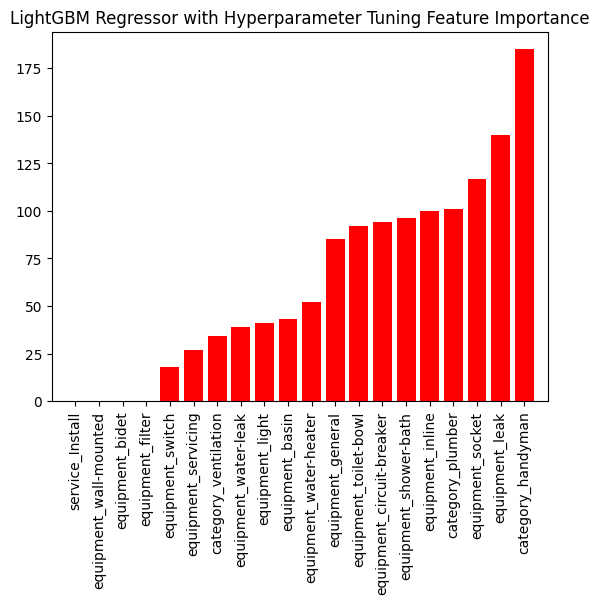

In [39]:
## Feature Evaluation
# Feature Importance Visualisation
skplt.estimators.plot_feature_importances(reg_lgbmr, feature_names = feature_names,
                                         title="LightGBM Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending")
skplt.estimators.plot_feature_importances(rscv_lgbm.best_estimator_, feature_names = feature_names,
                                         title="LightGBM Regressor with Hyperparameter Tuning Feature Importance",
                                         x_tick_rotation=90, order="ascending")

In [40]:
# Dump Model Into Pickle
pickle.dump(rscv_lgbm, open('../public/analytics/advanced/service-price-model.pkl', 'wb'))